<a href="https://colab.research.google.com/github/angelBM814/Estadistica/blob/main/Unidad5/PRO_u5Regresion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

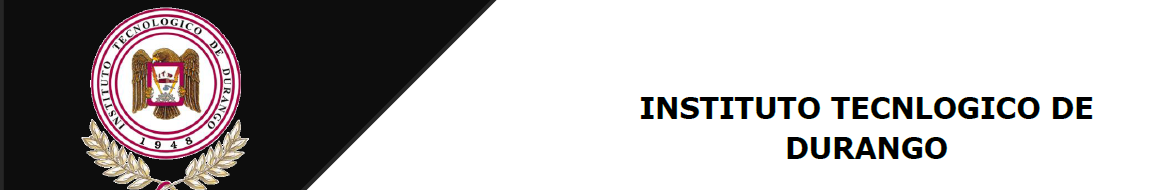
#Probabilidad y estadística
##Unidad 5
Practica Regresión Lineal y Correlación

Grupo 2Y

Alumno: Ángel Gabriel Barragán Martínez

Docente: Dr. José Gabriel Rodríguez Rivas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
autos2 = pd.read_csv("autos_corregidos.csv")
autos2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


###Regresión lineal Simple

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection


lm = LinearRegression()


# variables independientes o variables predictoras
x = autos2[["city-mpg"]]


# Variable dependiente o variable objetivo a predecir
y = autos2["price"]
x.head(10)
lm.fit(x,y)
Ypredict = lm.predict(x)
lm.intercept_
lm.coef_
lm.score(x,y)
Ypred = 34595.600 - 849.45 * 24
Ypred
consumos_de_3_vehiculos = [[24],[12],[8]]
lm.predict(consumos_de_3_vehiculos)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14208.72345381, 24402.16214829, 27799.97504646])

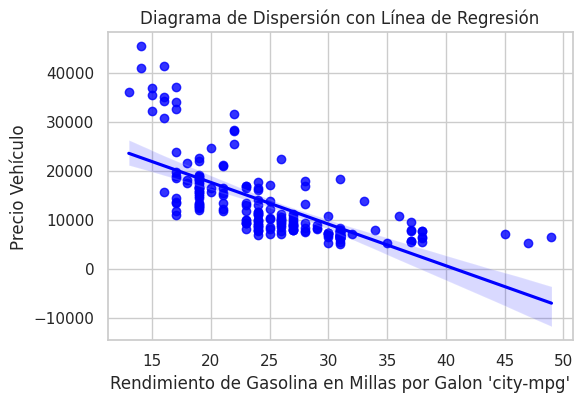

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir tamaño
plt.figure(figsize=(6, 4))

# Crear el diagrama de dispersión con línea de regresión
sns.set(style="whitegrid")
sns.regplot(x='city-mpg', y='price', data=autos2, scatter=True, color='blue')
plt.title("Diagrama de Dispersión con Línea de Regresión")
plt.xlabel("Rendimiento de Gasolina en Millas por Galon 'city-mpg'")
plt.ylabel("Precio Vehículo")
plt.grid(True)
plt.show()

###Regresión lineal multiple

In [ ]:
from sklearn.model_selection import train_test_split
autos2_train, autos2_test = train_test_split(autos2, random_state = 0)

In [ ]:
#Variables predictoras para la fase de entrenamiento
X_autos2_train = autos2_train[["horsepower","engine-size", "city-mpg", "wheel-base", "bore"]]

#Variables a predecir fase de entrenamiento
y_autos2_train = autos2_train[["price"]]

In [ ]:
#Variables predictoras para la fase de prueba
X_autos2_test = autos2_test[["horsepower","engine-size", "city-mpg", "wheel-base", "bore"]]

#Variables a predecir fase de prueba
y_autos2_test = autos2_test[["price"]]

In [ ]:
#Fase de entrenamiento del modelo lineal lm Metodo Fit
lm.fit(X_autos2_train, y_autos2_train)

LinearRegression()

In [ ]:
lm.coef_

array([[   55.87951468,    87.75631659,   -71.38957243,   318.47013286,
        -2035.30729795]])

In [ ]:
lm.intercept_

array([-26894.33570544])

In [ ]:
lm.score(X_autos2_train, y_autos2_train)

0.7914372491008562

###Fase de prueba

In [ ]:
#Fase de prueba del modelo lineal lm usando el metodo Predict
yhat = lm.predict(X_autos2_test)

In [ ]:
lm.score(X_autos2_test, y_autos2_test)

0.7991381308637932

###Evaluar el modelo usando visualización (gráficos)

<ipython-input-46-8d90bdf0a860>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_autos2_test["price"], hist=False, color="r")
<ipython-input-46-8d90bdf0a860>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(yhat, hist=False, color="b", ax = ax1)


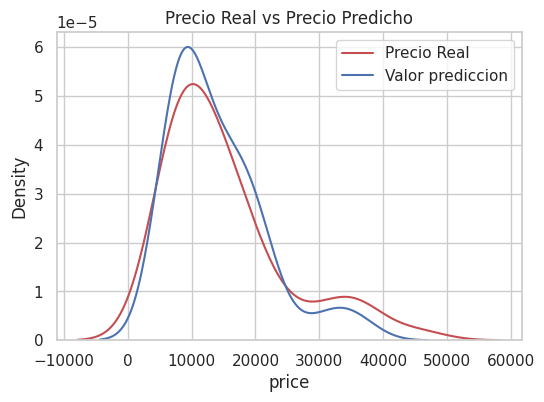

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,4))
ax1 = sns.distplot(y_autos2_test["price"], hist=False, color="r")
ax1 = sns.distplot(yhat, hist=False, color="b", ax = ax1)
plt.title("Precio Real vs Precio Predicho")
ax1.legend(labels=["Precio Real", "Valor prediccion"])
plt.show()
plt.close()

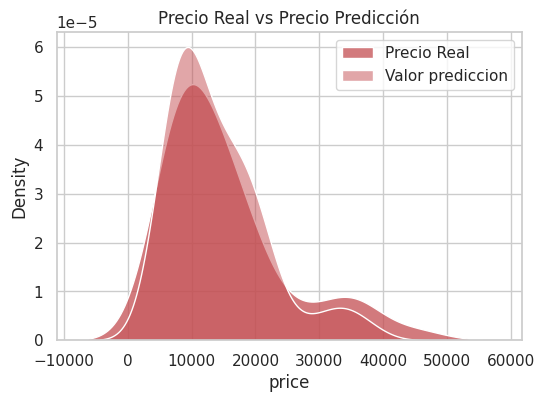

In [ ]:
plt.figure(figsize = (6, 4))
ax1 = sns.kdeplot(y_autos2_test["price"], multiple="stack", color="r")
ax1 = sns.kdeplot(pd.Series(yhat.flatten()), multiple="stack", alpha = 0.5, color = "r")
plt.title("Precio Real vs Precio Predicción")
ax1.legend(labels=["Precio Real", "Valor prediccion"])
plt.show()
plt.close()